In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import sys
sys.path.append('..')
from sleeprnn.nn import wave_augment
from sleeprnn.data import utils

In [72]:
# Definitions
window = 3
fs = 200
t = np.arange(window * fs) / fs
segment_label_ss = np.array([[200, 400]])
segment_label_ss = utils.stamp2seq(segment_label_ss, 0, window*fs-1)
tf.reset_default_graph()
soft_mask_tf = wave_augment.generate_soft_mask_from_labels_tf(segment_label_ss, fs, use_background=False)
with tf.Session() as sess:
    soft_mask = sess.run(soft_mask_tf)

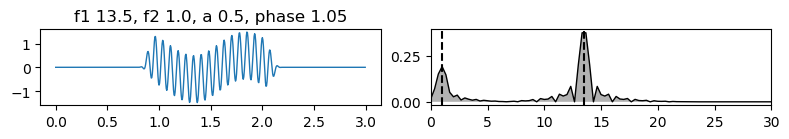

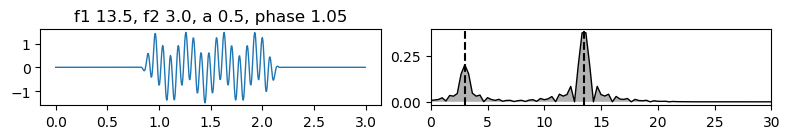

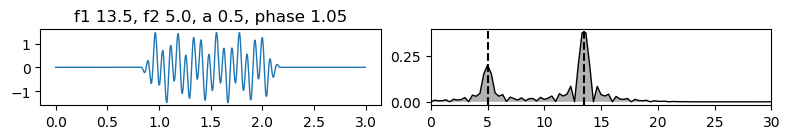

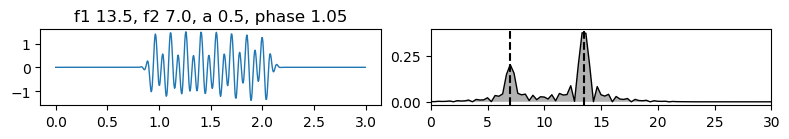

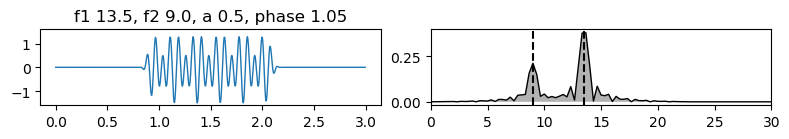

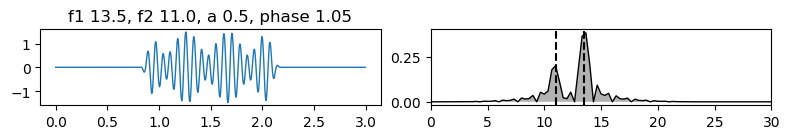

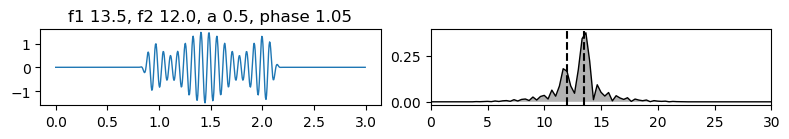

In [82]:
def draw_interference(freq_1, freq_2, amp_2, phase):
    x = np.cos(2 * np.pi * freq_1 * t) + amp_2 * np.cos(2 * np.pi * freq_2 * t + phase)
    x = x * soft_mask
    amp_freq, freqs = utils.power_spectrum(x, fs)
    fig, axes = plt.subplots(1, 2, figsize=(8, 1.5), dpi=100)
    axes[0].plot(t, x, linewidth=1)
    axes[0].set_ylim([-1-amp_2-0.1, 1+amp_2+0.1])
    axes[1].plot(freqs, amp_freq, linewidth=1, color='k')
    axes[1].fill_between(freqs, 0, amp_freq, facecolor='k', alpha=0.3)
    axes[1].set_xlim([0, 30])
    axes[1].axvline(freq_1, color='k', linestyle="--")
    axes[1].axvline(freq_2, color='k', linestyle="--")
    axes[0].set_title("f1 %1.1f, f2 %1.1f, a %1.1f, phase %1.2f" % (freq_1, freq_2, amp_2, phase))
    plt.tight_layout()
    plt.show()


amp_2 = 0.5
draw_interference(freq_1=13.5, freq_2=1, amp_2=amp_2, phase=np.pi/3)
draw_interference(freq_1=13.5, freq_2=3, amp_2=amp_2, phase=np.pi/3)
draw_interference(freq_1=13.5, freq_2=5, amp_2=amp_2, phase=np.pi/3)
draw_interference(freq_1=13.5, freq_2=7, amp_2=amp_2, phase=np.pi/3)
draw_interference(freq_1=13.5, freq_2=9, amp_2=amp_2, phase=np.pi/3)
draw_interference(freq_1=13.5, freq_2=11, amp_2=amp_2, phase=np.pi/3)
draw_interference(freq_1=13.5, freq_2=12, amp_2=amp_2, phase=np.pi/3)